## *This Notbook contain Lot of Model and Highest Achived Accuracy is Using Transfer Learning With ResNet50 as Pre-Trained Model Which also my final submission result*

---



# **Import Required Libraries**

In [1]:
import tensorflow as tf                      
import numpy as np      
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt               
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Load DataSet**

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(X, y), (_,__) = load_data()

In [3]:
# Assign variables to capture train test split output
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
print("There are ", len(x_train), "images in the training dataset")     # checking total number of records / data points available in the X_train dataset
print("There are ", len(x_val), "images in the test dataset")     # checking total number of records / data points available in the X_test dataset

There are  40000 images in the training dataset
There are  10000 images in the test dataset


## **Normalization**

In [5]:
x_train = x_train/255.0
x_val = x_val/255.0

In [6]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
#To convert the Class Labels in Categoical from Which is like One Hot Encoding The Class Labels

## **Basic FCN network**

In [11]:
model  = tf.keras.Sequential([
                        layers.Flatten(),
                        layers.Dense(128,input_shape = (3072,),activation='relu'),
                        layers.Dense(128,activation = 'relu'),
                        layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer = 'adam',loss ='categorical_crossentropy',metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=10,batch_size = 128)

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 1.9139 - accuracy: 0.3077
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 1.7285 - accuracy: 0.3807
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6533 - accuracy: 0.4070
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 1.5972 - accuracy: 0.4327
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 1.5497 - accuracy: 0.4476
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 1.5171 - accuracy: 0.4615
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 1.4918 - accuracy: 0.4701
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 1.4641 - accuracy: 0.4800
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 1.4422 - accuracy: 0.4866
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 1.4277 - accuracy: 0.4920



> Using This Simplest Model Achived Accuracy is 49% on Traing Data and 48% on Validation Data



In [13]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 1s 2ms/step - loss: 1.4713 - accuracy: 0.4824


[1.4712918996810913, 0.48240000009536743]

# **CNN Model without Image Augmentation**

Here I have Used CNN with Some Convolutional Layers With Filter of (3,3) and MaxPooling and in Fully Connected Dense Layer Regualarizer is User
More on L2 Regularizer [here](https://towardsdatascience.com/understanding-the-scaling-of-l%C2%B2-regularization-in-the-context-of-neural-networks-e3d25f8b50db)

In [21]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, 
                                               restore_best_weights=True,
                                               verbose=1)
model = tf.keras.models.Sequential([
                                    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
                                    layers.MaxPooling2D(2, 2),
                                    layers.Conv2D(64, (3,3), activation='relu'),
                                    layers.MaxPooling2D(2, 2),
                                    layers.Dropout(0.2),
                                    layers.Flatten(),
                                    layers.Dense(128, activation='relu',kernel_regularizer = 'l2'),
                                    layers.Dense(128, activation='relu',kernel_regularizer='l2'),
                                    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train,y_train,validation_data=(x_val, y_val),epochs=100,callbacks=[callbacks])

Epoch 1/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8904 - accuracy: 0.3912 - val_loss: 1.5672 - val_accuracy: 0.4951
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5466 - accuracy: 0.4963 - val_loss: 1.4345 - val_accuracy: 0.5472
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4309 - accuracy: 0.5467 - val_loss: 1.3381 - val_accuracy: 0.5828
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3512 - accuracy: 0.5802 - val_loss: 1.2698 - val_accuracy: 0.6138
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3006 - accuracy: 0.5973 - val_loss: 1.3174 - val_accuracy: 0.5912
Epoch 6/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.2600 - accuracy: 0.6121 - val_loss: 1.2079 - val_accuracy: 0.6198
Epoch 7/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.2236 - accuracy: 0.6266 - val_loss: 1.1979 - val_ac

Even After 100 Epochs the Training Accuracy is  72% and Validation Accuracy is 71% only

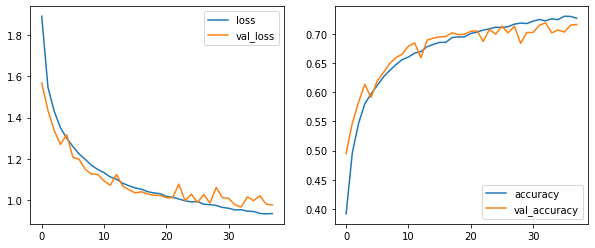

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

# **For Data Augmetation**

In [24]:
x_train_augment = x_train
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    horizontal_flip = True,
)
datagen.fit(x_train_augment)

# **CNN Model With DataAugmuntation**



>**After 1 Hour train model reaches 87% Validation Accuracy without Callback and with callback validation accuracy is 76%**



In [26]:
INPUT_SHAPE = (32,32,3)
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, 
                                               restore_best_weights=True,
                                               verbose=1)

model = tf.keras.Sequential([
                              layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE),
                              layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
                              layers.BatchNormalization(),
                              layers.MaxPooling2D((2, 2)),
                             
                              layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                              layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                              layers.BatchNormalization(),
                              layers.MaxPooling2D((2, 2)),
                             
                              layers.Flatten(),
                              layers.Dropout(0.3),

                              layers.Dense(128, activation='relu'),
                              layers.Dense(128, activation='relu'),
                              layers.Dense(10, activation='softmax')
])                        

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(datagen.flow(x_train_augment, y_train, batch_size=128),
                    validation_data=(x_val, y_val),
                    epochs=300 ,callbacks =[callbacks])

Epoch 1/300
313/313 [==============================] - 19s 59ms/step - loss: 1.6039 - accuracy: 0.4205 - val_loss: 5.8313 - val_accuracy: 0.1276
Epoch 2/300
313/313 [==============================] - 18s 59ms/step - loss: 1.2579 - accuracy: 0.5515 - val_loss: 1.3534 - val_accuracy: 0.5457
Epoch 3/300
313/313 [==============================] - 19s 60ms/step - loss: 1.1214 - accuracy: 0.6015 - val_loss: 1.0327 - val_accuracy: 0.6361
Epoch 4/300
313/313 [==============================] - 18s 59ms/step - loss: 1.0168 - accuracy: 0.6393 - val_loss: 1.0232 - val_accuracy: 0.6387
Epoch 5/300
313/313 [==============================] - 19s 60ms/step - loss: 0.9351 - accuracy: 0.6676 - val_loss: 0.9812 - val_accuracy: 0.6612
Epoch 6/300
313/313 [==============================] - 18s 59ms/step - loss: 0.8740 - accuracy: 0.6908 - val_loss: 0.8837 - val_accuracy: 0.6922
Epoch 7/300
313/313 [==============================] - 19s 59ms/step - loss: 0.8305 - accuracy: 0.7081 - val_loss: 0.8867 - val_ac




>Here Using Image Augmantaion on Trainig Data and Addding Few more Layer To the Model along with Batch Normalization Model Performs Better then Prevoius one But it takes about 190 Epochs to reach 87% Accuracy in 1 Hour without CallBack .
Batch normalization reduces the amount by what the hidden unit values shift around (covariance shift).
more on [Batch Normalization](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c)



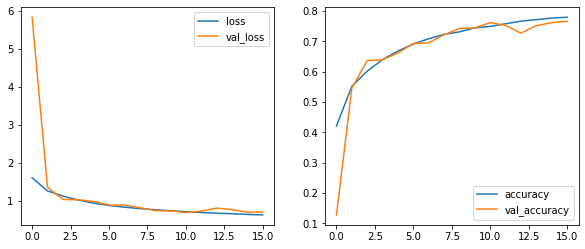

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

# **Using Transfer Learning Here I have User ResNet50**



>ResNet50 with just the convolutional layers and not the dense layers so we can train our new dataset on the new dense layers that we create. Here input size for model is intialized to (256,256,3) as i have done upsampling for Training data



In [28]:
# Getting ResNet50 and usng weights of imagenet dataset
base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base.summary()

94773248/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________

In [29]:
ES_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

In [30]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=20, validation_data=(x_val, y_val),callbacks=[ES_callback])

Epoch 1/10
2000/2000 [==============================] - 582s 291ms/step - loss: 0.2565 - acc: 0.4327 - val_loss: 0.1209 - val_acc: 0.7750
Epoch 2/10
2000/2000 [==============================] - 593s 296ms/step - loss: 0.1716 - acc: 0.6661 - val_loss: 0.0832 - val_acc: 0.8613
Epoch 3/10
2000/2000 [==============================] - 593s 296ms/step - loss: 0.1326 - acc: 0.7664 - val_loss: 0.0577 - val_acc: 0.9106
Epoch 4/10
2000/2000 [==============================] - 586s 293ms/step - loss: 0.1083 - acc: 0.8237 - val_loss: 0.0466 - val_acc: 0.9260
Epoch 5/10
2000/2000 [==============================] - 585s 293ms/step - loss: 0.0890 - acc: 0.8630 - val_loss: 0.0442 - val_acc: 0.9302
Epoch 6/10
2000/2000 [==============================] - 588s 294ms/step - loss: 0.0735 - acc: 0.8953 - val_loss: 0.0377 - val_acc: 0.9396
Epoch 7/10
2000/2000 [==============================] - 587s 294ms/step - loss: 0.0618 - acc: 0.9165 - val_loss: 0.0370 - val_acc: 0.9400
Epoch 8/10
2000/2000 [============


> Here I have Used ResNet50 For Transfer Learning Technique Which is using weights of imagenet Dataset Here first the UPSampling is Applied to enlarge the (32,32) pixles in (256,256) size and then the base Resnet50 model ,BatchNormalization and FullyConnected Dense Layers
 
 **More on UpSampling [Link](https://www.machinecurve.com/index.php/2019/12/11/upsampling2d-how-to-use-upsampling-with-keras/#what-is-upsampling)**






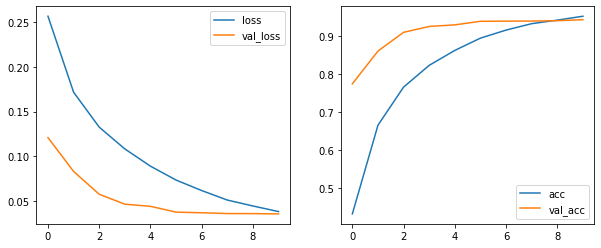

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['acc', 'val_acc']].plot(kind='line', ax=ax[1]);

Saving the model for Final Prediction

# **Save The Model For Future Use**

In [35]:
model.save('TransferLearning_Model.h5')
del model
model = tf.keras.models.load_model('TransferLearning_Model.h5')

# **Predicting the Values using Test Dataset**

In [36]:
import pandas as pd
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")
df = test_data.copy()

#Input File is Flattend so Resize it for Testing Model .
df = np.array(df).reshape(df.shape[0],32,32,3) 

# Normalizing The Test Data
df = df/255.0

# Final Predicted Values
pred = model.predict(df)

# Printing Predicted Values in CSV Format
for i in pred:
  print(np.argmax(i),end=",")

2,3,7,8,6,1,3,7,3,5,8,1,4,1,3,7,0,0,7,6,5,9,4,8,4,0,8,7,0,7,7,3,2,4,2,0,6,4,4,4,7,2,5,1,4,3,3,2,4,4,3,8,7,5,8,1,1,7,1,0,3,1,7,6,1,1,9,8,5,1,6,6,9,6,2,0,4,5,4,8,4,5,8,9,1,7,3,6,3,4,3,9,9,8,9,0,0,7,1,6,8,5,2,7,0,9,4,8,3,0,5,0,0,0,1,7,6,5,0,2,9,6,1,0,6,3,7,0,1,8,4,8,3,8,3,7,9,0,9,6,7,7,5,4,4,6,4,8,2,0,6,4,2,8,5,5,5,5,2,4,5,2,9,8,4,3,6,1,8,1,2,7,9,2,1,6,0,2,3,7,6,7,2,5,2,3,4,7,4,3,3,8,0,5,0,0,4,6,8,1,8,2,3,5,8,0,1,0,0,3,2,8,1,5,6,8,2,4,1,5,2,4,4,7,5,7,3,2,3,7,7,6,3,1,9,8,8,8,0,7,1,7,2,5,2,4,3,4,6,1,8,8,0,9,6,5,3,8,0,2,4,8,2,9,8,3,0,1,0,2,8,8,8,9,2,6,1,6,3,1,0,7,3,1,4,0,3,4,8,4,7,4,0,1,0,1,3,3,9,2,2,3,3,0,0,4,4,9,5,9,2,3,7,1,1,3,2,3,8,0,5,9,1,9,4,9,9,1,8,8,6,6,8,7,5,9,6,2,5,2,4,0,1,2,2,2,6,3,8,7,0,2,0,0,3,4,1,1,9,0,8,4,3,1,1,7,4,3,9,7,8,6,1,0,7,3,5,9,2,5,3,9,4,0,0,5,2,1,7,6,3,7,6,6,8,4,4,2,4,4,1,6,3,8,5,9,1,9,3,6,1,5,8,7,9,4,3,3,4,1,3,0,8,3,9,0,3,6,3,3,3,0,3,8,2,8,9,4,7,1,2,8,0,9,9,3,4,9,9,6,9,5,6,5,7,4,1,7,1,1,3,3,8,2,3,3,8,5,8,0,8,7,5,9,6,9,1,4,5,5,8,4,7,1,0,9,4,5,1,7,4,6,7,9,3,2,0,6,8,3,

# **Visualizig Some of The Output Files And Predicted Labels**

In [37]:
labels={0:'airplane',1:'automobile',2: 'bird',3: 'cat',4: 'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

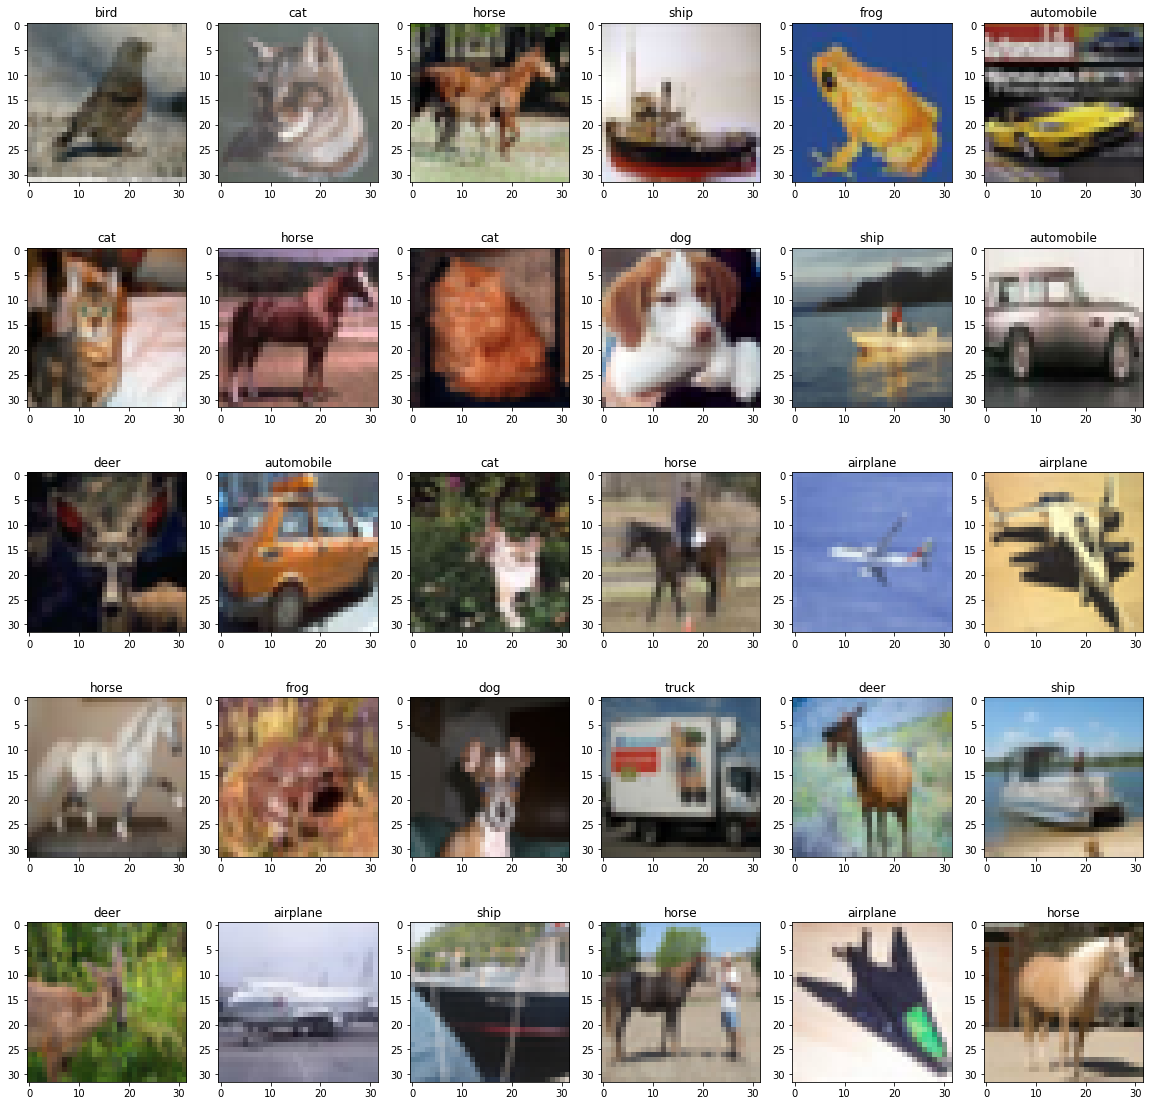

In [38]:
plt.figure(figsize=(20,20))
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.title(labels[(np.argmax(pred[i]))])
  plt.imshow(df[i])